In [ ]:
pip install sklearn

In [ ]:
pip install squarify

In [ ]:
pip install isodate

     |████████████████████████████████| 41 kB 362 kB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import squarify 
import matplotlib as mpl
import isodate
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tweet1 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/29042022M.csv')
tweet2 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/30042022M.csv')
tweet3 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/01052022M.csv')
tweet4 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/02052022M.csv')
tweet5 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/03052022M.csv')
tweet6 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/04052022M.csv')
tweet7 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/05052022M.csv')
tweet8 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/06052022M.csv')
tweet9 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/30042022S.csv')
tweet10 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/01052022S.csv')
tweet11 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/02052022S.csv')
tweet12 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/03052022S.csv')
tweet13 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/04052022S.csv')
tweet14 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/05052022S.csv')
tweet15 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/06052022S.csv')
tweet = pd.concat([tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8,
                   tweet9, tweet10, tweet11, tweet12, tweet13, tweet14, tweet15])
tweet.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(267531, 90)

In [ ]:
tweet = tweet.drop_duplicates(subset = 'status_id')
tweet.shape

(156059, 90)

In [ ]:
tweet = tweet.reset_index()

In [ ]:
tweet = tweet.drop('index', axis = 1)
tweet.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1413381682502066180,x1520062251319046144,2022-04-29 15:27:36,kejutam,@kkomu18 @lets_winwing ditunggu mudik nya ke B...,Twitter for Android,41,x1519998398107029504,x1248366359659950081,kkomu18,...,7612,2757,2021-07-09 06:17:41,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14133816...,NaN,http://pbs.twimg.com/profile_images/1486307564...
1,x1429810270898049030,x1520062247283806209,2022-04-29 15:27:35,Gajah_Mada01,"Mudik Aman,lancar dan gembira serta kembali ke...",Twitter Web App,140,NaN,NaN,NaN,...,4105,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...
2,x1429810270898049030,x1520046431884955648,2022-04-29 14:24:45,Gajah_Mada01,Menkominfo berharap masyarakat yang mudik untu...,Twitter Web App,261,NaN,NaN,NaN,...,4105,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...
3,x1429810270898049030,x1520051249193709570,2022-04-29 14:43:53,Gajah_Mada01,Menkominfo hari ini melepas 180 sivitas yang m...,Twitter Web App,267,NaN,NaN,NaN,...,4105,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...
4,x818341300797722624,x1519964545225469953,2022-04-29 08:59:21,PoldaJogja,"""Di mana dalam perayaan Idul Fitri tahun 2022,...",Twitter Web App,173,x1519964424031051776,x818341300797722624,PoldaJogja,...,25267,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...


In [ ]:
tweet.to_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/tweet.csv')

# **Timeline of Tweet (Tweet per jam)**

**Penyesuaian Format Data**

In [ ]:
created_at = tweet.iloc[:,[1,2]]
created_at

,status_id,created_at
0,x1520062251319046144,2022-04-29 15:27:36
1,x1520062247283806209,2022-04-29 15:27:35
2,x1520046431884955648,2022-04-29 14:24:45
3,x1520051249193709570,2022-04-29 14:43:53
4,x1519964545225469953,2022-04-29 08:59:21
...,...,...
156054,x1522252202173415424,2022-05-05 16:29:41
156055,x1522224420827254784,2022-05-05 14:39:18
156056,x1522103695839985665,2022-05-05 06:39:35
156057,x1521870880225525761,2022-05-04 15:14:27


In [ ]:
# Mengambil data waktu pengunggahan tweet dalam satuan jam
hour=[]

from datetime import *
for i in range(len(created_at)):
    time = datetime.strptime(created_at['created_at'][i], "%Y-%m-%d %H:%M:%S")
    get_hour=dict(hour=time.hour,
                 status_id=created_at['status_id'][i])
    hour.append(get_hour)

In [ ]:
hour=pd.DataFrame(hour)
hour.head()

,hour,status_id
0,15,x1520062251319046144
1,15,x1520062247283806209
2,14,x1520046431884955648
3,14,x1520051249193709570
4,8,x1519964545225469953


In [ ]:
#Merge Rawdata with hour
tweet_hour = pd.merge(left=tweet, right=hour, how='left', left_on='status_id', right_on='status_id')
tweet_hour.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,hour
0,x1413381682502066180,x1520062251319046144,2022-04-29 15:27:36,kejutam,@kkomu18 @lets_winwing ditunggu mudik nya ke B...,Twitter for Android,41,x1519998398107029504,x1248366359659950081,kkomu18,...,2757,2021-07-09 06:17:41,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14133816...,NaN,http://pbs.twimg.com/profile_images/1486307564...,15
1,x1429810270898049030,x1520062247283806209,2022-04-29 15:27:35,Gajah_Mada01,"Mudik Aman,lancar dan gembira serta kembali ke...",Twitter Web App,140,NaN,NaN,NaN,...,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...,15
2,x1429810270898049030,x1520046431884955648,2022-04-29 14:24:45,Gajah_Mada01,Menkominfo berharap masyarakat yang mudik untu...,Twitter Web App,261,NaN,NaN,NaN,...,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...,14
3,x1429810270898049030,x1520051249193709570,2022-04-29 14:43:53,Gajah_Mada01,Menkominfo hari ini melepas 180 sivitas yang m...,Twitter Web App,267,NaN,NaN,NaN,...,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...,14
4,x818341300797722624,x1519964545225469953,2022-04-29 08:59:21,PoldaJogja,"""Di mana dalam perayaan Idul Fitri tahun 2022,...",Twitter Web App,173,x1519964424031051776,x818341300797722624,PoldaJogja,...,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...,8


In [ ]:
# Mengubah format data kolom created_at menjadi tipe data datetime 
tweet_hour['created_at'] = pd.to_datetime(tweet_hour['created_at']).dt.date

In [ ]:
agg_data_by_hour = tweet_hour.groupby(['created_at', 'hour'], as_index=False).size()
agg_data_by_hour

,created_at,hour,size
0,2022-04-29,8,2106
1,2022-04-29,9,2337
2,2022-04-29,10,2077
3,2022-04-29,11,2300
4,2022-04-29,12,2465
...,...,...,...
162,2022-05-06,14,592
163,2022-05-06,15,505
164,2022-05-06,16,492
165,2022-05-06,17,305


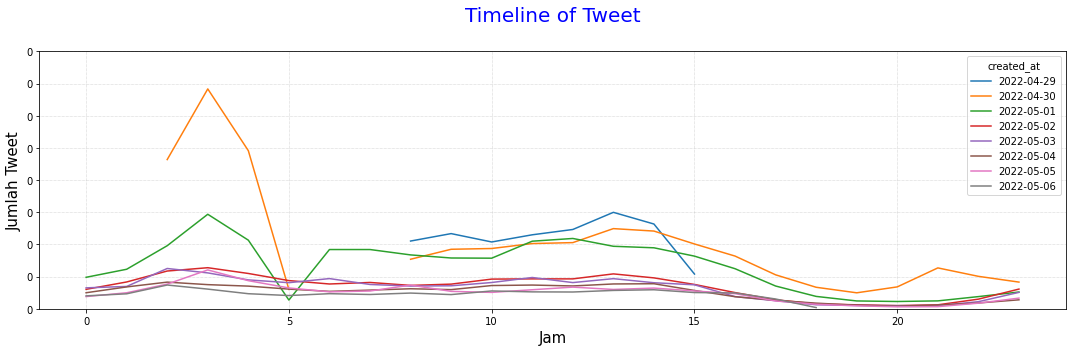

In [ ]:
# Plot Multi-Line Chart
tweet_hour.groupby(['hour','created_at'])['screen_name'].count().unstack().plot()
plt.title('Timeline of Tweet', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Jam', fontsize=15)
plt.ylabel('Jumlah Tweet',fontsize=15)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(15,5)
plt.tight_layout()
plt.savefig('tweet_per_jam_per_hari.png')
plt.show()

Pada tanggal **29 April 2022**, pengambilan data dilakukan pada pukul 22.00 malam sehingga data tweet yang didapatkan hanya tweet yang diunggah pada jam 8 - 15. Secara umum terlihat dari tanggal **30 April - 5 May**, pola jumlah tweet yang diunggah per jam memiliki kesamaan yaitu naik di rentang  jam 3-4 pagi lalu menurun, naik lagi pada jam 1-2 siang dan kembali turun pada sore dan malam hari. Pada tanggal 6 May yang merupakan arus balik jumlah tweet yang dipost lebih rendah dibandingkan hari lainnya. 

# **User dengan tweet mudik terbanyak**


In [ ]:
# Menyeleksi akun yang diverifikasi ✔️
is_verified = tweet_hour[['screen_name','verified']]
is_verified = is_verified.drop_duplicates(subset = 'screen_name')
is_verified.head()

,screen_name,verified
0,kejutam,False
1,Gajah_Mada01,False
4,PoldaJogja,True
17,boriissssssss,False
18,chslovesme,False


In [ ]:
is_verified.shape

(88514, 2)

In [ ]:
agg_data_by_user = tweet_hour.groupby('screen_name', as_index=False).size()
agg_data_by_user = agg_data_by_user.sort_values(by=['size'], ascending=False)
agg_data_by_user = pd.merge(left=agg_data_by_user, right=is_verified, how='left', left_on='screen_name', right_on='screen_name')
agg_data_by_user

,screen_name,size,verified
0,PTJASAMARGA,609,True
1,opsiin,562,False
2,kompascom,315,False
3,kumparan,248,True
4,topinfo_id,243,False
...,...,...,...
88509,byfarizii,1,False
88510,byezig,1,False
88511,byewoon,1,False
88512,byetobbyyy,1,False


In [ ]:
agg_data_by_user_top10 = agg_data_by_user.head(9)
agg_data_by_user_top10

,screen_name,size,verified
0,PTJASAMARGA,609,True
1,opsiin,562,False
2,kompascom,315,False
3,kumparan,248,True
4,topinfo_id,243,False
5,perhubunganjtg,222,True
6,kompasiana,192,False
7,jpnncom,181,True
8,medcom_id,154,True


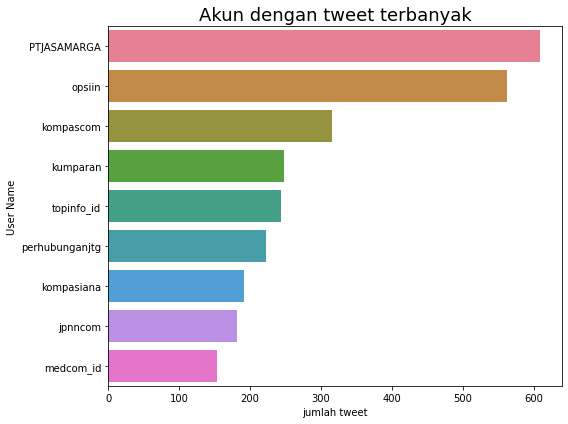

In [ ]:
# Plot Top 10 User with most tweets
user = agg_data_by_user_top10['screen_name']
number_of_tweet = agg_data_by_user_top10['size']
 
# Figure Size
plt.figure(figsize=(8, 6))
 
# Bar Plot
sns.barplot(x="size", y="screen_name", data=agg_data_by_user_top10,
            palette='husl')
 
# Add Plot Title
plt.title('Akun dengan tweet terbanyak',
             loc ='center', fontsize=18)
# Add Label
plt.xlabel('jumlah tweet')
plt.ylabel('User Name')


plt.tight_layout()
plt.savefig('top10_user_most_tweet.png')
# Show Plot
plt.show()

Akun dengan tweet mudik terbanyak didominasi oleh **akun-akun media informasi** seperti opsiin, kompascom, kumparan. Selain itu, **akun pemerintah** yang memiliki tweet mudik terbanyak yaitu akun PTJASAMARGA (offficial twitter Lalu Lintas Jasa Marga yang merupakan perintis penyelenggaraan jalan tol di Indonesia ) dan akun perhubunganjtg (akun resmi Dinas Perhubungan Provinsi Jawa Tengah).

**Plot berdasarkan verifikasi akun**

In [ ]:
agg_data_by_user_ver = agg_data_by_user.loc[agg_data_by_user['verified']==True]
agg_data_by_user_ver.head()

,screen_name,size,verified
0,PTJASAMARGA,609,True
3,kumparan,248,True
5,perhubunganjtg,222,True
7,jpnncom,181,True
8,medcom_id,154,True


In [ ]:
agg_data_by_user_unver = agg_data_by_user.loc[agg_data_by_user['verified']==False]
agg_data_by_user_unver

,screen_name,size,verified
1,opsiin,562,False
2,kompascom,315,False
4,topinfo_id,243,False
6,kompasiana,192,False
9,FWBESS,154,False
...,...,...,...
88509,byfarizii,1,False
88510,byezig,1,False
88511,byewoon,1,False
88512,byetobbyyy,1,False


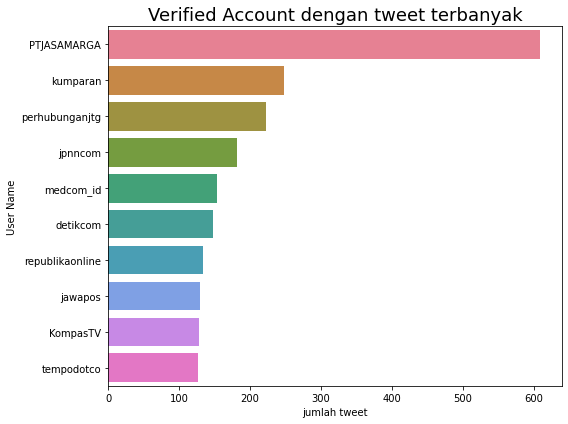

In [ ]:
# Plot Top 10 Verified User with most tweets
agg_data_by_user_ver_top10 = agg_data_by_user_ver.sort_values(by=['size'], ascending=False).head(10) 
user_ver = agg_data_by_user_ver_top10['screen_name']
number_of_tweet_ver = agg_data_by_user_ver_top10['size']
 
# Figure Size
plt.figure(figsize=(8, 6))
# Bar Plot
sns.barplot(x="size", y="screen_name", data=agg_data_by_user_ver_top10,
            palette='husl')
# Add Plot Title
plt.title('Verified Account dengan tweet terbanyak',
             loc ='center', fontsize=18)
# Add Label
plt.xlabel('jumlah tweet')
plt.ylabel('User Name')

plt.tight_layout()
plt.savefig('top10_user_most_tweet_ver.png')
# Show Plot
plt.show()

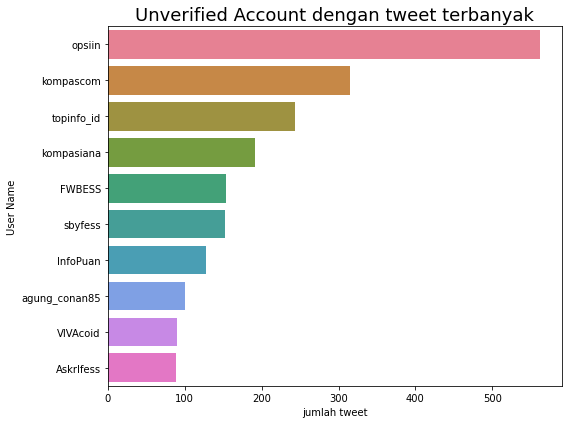

In [ ]:
# Plot Top 10 UnVerified User with most tweets
agg_data_by_user_unver_top10 = agg_data_by_user_unver.sort_values(by=['size'], ascending=False).head(10) 
user_unver = agg_data_by_user_unver_top10['screen_name']
number_of_tweet_unver = agg_data_by_user_unver_top10['size']

# Figure Size
plt.figure(figsize=(8, 6))
# Bar Plot
sns.barplot(x="size", y="screen_name", data=agg_data_by_user_unver_top10,
            palette='husl')
# Add Plot Title
plt.title('Unverified Account dengan tweet terbanyak',
             loc ='center', fontsize=18)
# Add Label
plt.xlabel('jumlah tweet')
plt.ylabel('User Name')
plt.tight_layout()
plt.savefig('top10_user_most_tweet_unver.png')
# Show Plot
plt.show()

# **Hashtag**

In [ ]:
tweet_hastag = tweet['hashtags'].dropna()
tweet_hastag.head()

7     PoldaDIY PoldaJogja Mudik2022 Polisi Dishub Pa...
9         poldadiy poldajogja OpsKetupatProgo2022 mudik
13        PoldaDIY PoldaJogja OpsKetupatProgo2022 Mudik
48                                             IDCORNER
49                                             IDCORNER
Name: hashtags, dtype: object

In [ ]:
def hastag_lower(kalimat):
  kalimat = str(kalimat).lower()
  return kalimat
tweet_hastag = tweet_hastag.apply(hastag_lower)
tweet_hastag.head()

7     poldadiy poldajogja mudik2022 polisi dishub pa...
9         poldadiy poldajogja opsketupatprogo2022 mudik
13        poldadiy poldajogja opsketupatprogo2022 mudik
48                                             idcorner
49                                             idcorner
Name: hashtags, dtype: object

Daftar hashtag per baris dipisahkan berdasarkan spasi sehingga untuk mengetahui banyak tweet per hashtag terlebih dahulu dibentuk document term matrix. 

In [ ]:
vectorizer = CountVectorizer(ngram_range =(1,1), min_df = 100)
doc_matrix = vectorizer.fit_transform(tweet_hastag)
doc_matrix = doc_matrix.toarray()

In [ ]:
doc_df = pd.DataFrame(data = doc_matrix)
doc_df.columns = vectorizer.get_feature_names()
doc_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,arusbalik,aviasipariwisataindonesia,ayuspahruddin,banyumas,beritaterkini,bestsellergosend,bumnuntukindonesia,ceriakansilaturahmi,demipemulihanindonesia,digitalbisa,...,polrestabanyumasbebatiran,polripresisi,poskomudikpersaudaraan,prokesmudiksehat,purwokerto,sonoranetwork,tetapprokessaatlebaran,wujudkankebersamaanlebaran,wujudkanpembangunanri,wulingsiagamudik
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
doc_df.loc['Total',:] = doc_df.sum(axis=0)
doc_df.iloc[:, np.argsort(doc_df.loc['Total'])]

,hotelmurah,eidmubarak,bestsellergosend,likeforlikeback,likesforlike,like,follow,sonoranetwork,mudikamansehat2022,likeforlikes,...,erickthohirsolusirakyat,lebarandengankhilafah,kapitalismenyusahin,lebaran,mudik2022,lpkapalembang,patuhilalinarusbalik,patuhiprokeslebaran,mudik,patuhilalindanprokes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total = doc_df.loc['Total'].sort_values(ascending = False)
total.head()

patuhilalindanprokes    4571.0
mudik                   1803.0
patuhiprokeslebaran     1632.0
patuhilalinarusbalik    1137.0
lpkapalembang            973.0
Name: Total, dtype: float64

In [ ]:
total = pd.DataFrame(total).reset_index()
total = total[total["Total"]>500]
total.head()

,index,Total
0,patuhilalindanprokes,4571.0
1,mudik,1803.0
2,patuhiprokeslebaran,1632.0
3,patuhilalinarusbalik,1137.0
4,lpkapalembang,973.0


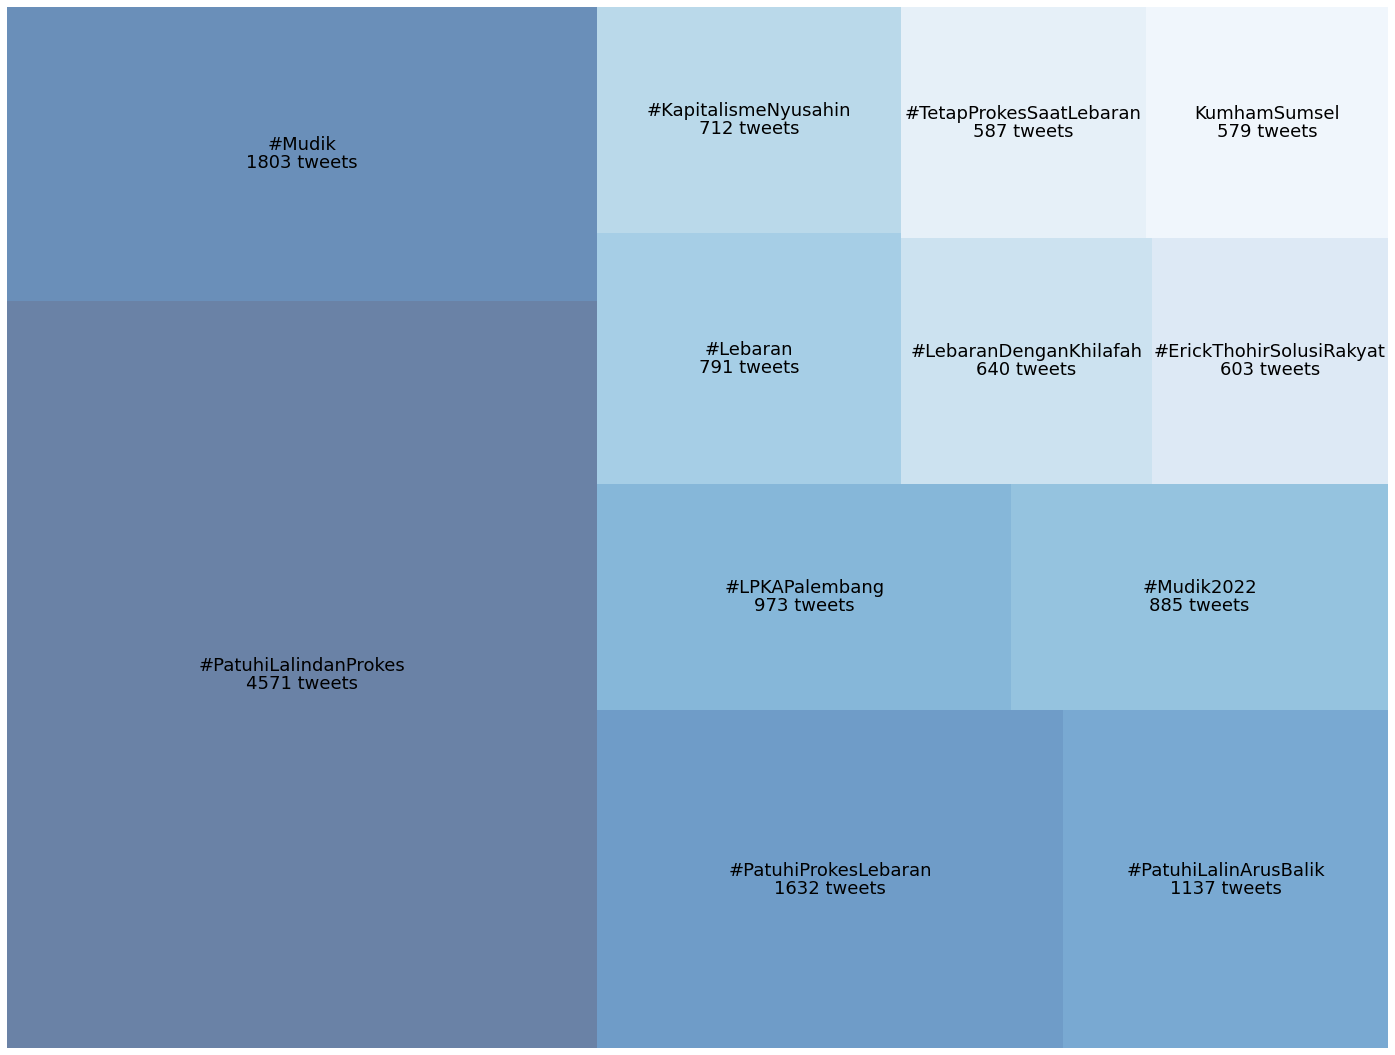

In [ ]:
# Membuat treeplot
plt.rcParams["figure.figsize"] = [20, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = 18
plt.rcParams['text.color'] = 'black'

cmap = mpl.cm.get_cmap('Blues_r')
mapped_list = [cmap(i) for i in np.arange(0, 1, 1/len(total['Total']))]

total['Total'] = pd.to_numeric(total['Total'], downcast = 'integer')
values = ['{} tweets'.format(s) for s in total['Total']]
label = ['#PatuhiLalindanProkes', '#Mudik', '#PatuhiProkesLebaran', '#PatuhiLalinArusBalik', '#LPKAPalembang', '#Mudik2022',
         '#Lebaran', '#KapitalismeNyusahin', '#LebaranDenganKhilafah', '#ErickThohirSolusiRakyat', '#TetapProkesSaatLebaran',
         'KumhamSumsel']

squarify.plot(sizes=total['Total'] , label= label, value = values, alpha=0.6,
              color = mapped_list)
plt.axis('off')
plt.show()

Hashtag-hashtag yang banyak dipakai seperti #PatuhiLalindanProkes, #PatuhiProkesLebaran, dan #PatuhiLalinArusBalik merupakan hashtag yang digunakan oleh Humas Kepolisian dari berbagai tingkatan dan wilayah. 
Terdapat beberapa hashtag yang tidak terlalu berkaitan dengan mudik dan lebaran yaitu #KapitalismeNyusahin dan #ErickThohirSolusiRakyat. Oleh karena itu, eksplorasi dilanjutkan dengan membentuk wordcloud pada tweet dengan kedua hashtag tersebut. 

In [ ]:
idx = tweet['hashtags'].dropna()
tweet_hashtag_all = tweet.loc[idx.index]
tweet_hashtag_all.shape

(23875, 90)

In [ ]:
tweet_hashtag_all['idx'] = tweet_hashtag_all['hashtags'].str.lower().str.find('kapitalismenyusahin')
tweet_hashtag_all.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,idx
7,x818341300797722624,x1520062239574999047,2022-04-29 15:27:33,PoldaJogja,Sehingga tujuan mudik aman dan sehat dapat ter...,Twitter Web App,114,x1520062155793780736,x818341300797722624,PoldaJogja,...,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...,-1
9,x818341300797722624,x1519964697680031745,2022-04-29 08:59:58,PoldaJogja,Kegiatan dilanjutkan dengan arahan dari tim Su...,Twitter Web App,204,x1519964631141588992,x818341300797722624,PoldaJogja,...,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...,-1
13,x818341300797722624,x1520020332534693888,2022-04-29 12:41:02,PoldaJogja,"Turut hadir mendampingi Wakapolda, Dirpolair P...",Twitter Web App,255,x1520020185662767107,x818341300797722624,PoldaJogja,...,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...,-1
48,x168469708,x1520036712084537345,2022-04-29 13:46:07,IDCorner,"2,5 Juta Orang Sudah Mudik Hingga H-4 Lebaran ...",IDCorner.Co.iD,83,NaN,NaN,NaN,...,362,2010-07-19 12:10:57,False,https://t.co/sxOmdA2ELd,https://idcorner.co.id,NaN,https://pbs.twimg.com/profile_banners/16846970...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1116895717...,-1
49,x168469708,x1519970944785158145,2022-04-29 09:24:47,IDCorner,Bosch Ajak Masyarakat Memeriksa Kelistrikan Mo...,IDCorner.Co.iD,101,NaN,NaN,NaN,...,362,2010-07-19 12:10:57,False,https://t.co/sxOmdA2ELd,https://idcorner.co.id,NaN,https://pbs.twimg.com/profile_banners/16846970...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1116895717...,-1


Dengan menggunakan fungsi **str.find()**, kolom baru "idx" berisi -1 jika tidak terdapat kata tertentu dan berisi nilai index penemuan kata pertama jika baris memiliki kata tertentu

In [ ]:
tweet_hashtag_kapitalisme = tweet_hashtag_all[tweet_hashtag_all["idx"] != -1]

In [ ]:
tweet_hashtag_kapitalisme.shape

(711, 91)

In [ ]:
tweet_hashtag_kapitalisme = tweet_hashtag_kapitalisme[['status_id', 'screen_name', 'text']]
tweet_hashtag_kapitalisme_unik_tweet = tweet_hashtag_kapitalisme.drop_duplicates('text')
tweet_hashtag_kapitalisme_unik_tweet.shape

(155, 3)

In [ ]:
tweet_hashtag_kapitalisme_unik_user = tweet_hashtag_kapitalisme.drop_duplicates('screen_name')
tweet_hashtag_kapitalisme_unik_user.shape

(218, 3)

Dari 711 tweet yang menggunakan hashtag #KapitalismeNyusahin terdapat 155 isi tweet yang berbeda dari 218 user yang berbeda sehingga beberapa user kemungkinan mengunggah tweet yang isinya sama. 

In [ ]:
tweet_clean = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/all_clean.csv')
tweet_clean.head()

,Unnamed: 0,statusID,text
0,0,x1520062251319046144,tunggu mudik bantul capres
1,1,x1520062247283806209,mudik aman lancar gembira jakarta kondisi seha...
2,2,x1520046431884955648,menkominfo harap masyarakat mudik laksana prot...
3,3,x1520051249193709570,menkominfo lepas sivitas mudik kominfo ayo pul...
4,4,x1519964545225469953,raya idul fitri perintah larang masyarakat mud...


Data tersebut merupakan data tweet yang sudah dilakukan praproses data berupa *case folding*, penghapusan angka, tanda baca, dan spasi berlebih, *stemming*, normalisasi, penghapusan *stopword*. Untuk tutorialnya bisa dilihat pada *notebook* *Phrase Network Analysis* yang tersedia pada repositori ini. 

In [ ]:
tweet_clean = tweet_clean[['statusID', 'text']]
tweet_clean.columns = ['status_id', 'text']
tweet_clean.head()

,status_id,text
0,x1520062251319046144,tunggu mudik bantul capres
1,x1520062247283806209,mudik aman lancar gembira jakarta kondisi seha...
2,x1520046431884955648,menkominfo harap masyarakat mudik laksana prot...
3,x1520051249193709570,menkominfo lepas sivitas mudik kominfo ayo pul...
4,x1519964545225469953,raya idul fitri perintah larang masyarakat mud...


In [ ]:
tweet_clean_kapitalisme = pd.merge(tweet_clean, tweet_hashtag_kapitalisme, how="right", on=["status_id"])
tweet_clean_kapitalisme.head()

,status_id,text_x,screen_name,text_y
0,x1520440540541906946,perintah syarat vaksinasi booster masyarakat m...,AisyahH52509142,Pemerintah mensyaratkan vaksinasi booster bagi...
1,x1520440666706558978,mudik wajib booster motogp negara sikap adil s...,AisyahH52509142,"Mudik Wajib Booster, MotoGP Tidak, Negara Tida..."
2,x1520440377731592192,mudik lebaran kian jelang mudik laku batas aki...,AisyahH52509142,Mudik Lebaran kian menjelang. Ini adalah mudik...
3,x1520435228426129408,perintah syarat vaksinasi booster masyarakat m...,yeojakhwat,Pemerintah mensyaratkan vaksinasi booster bagi...
4,x1520435063304773632,mudik lebaran kian jelang mudik laku batas aki...,yeojakhwat,Mudik Lebaran kian menjelang. Ini adalah mudik...


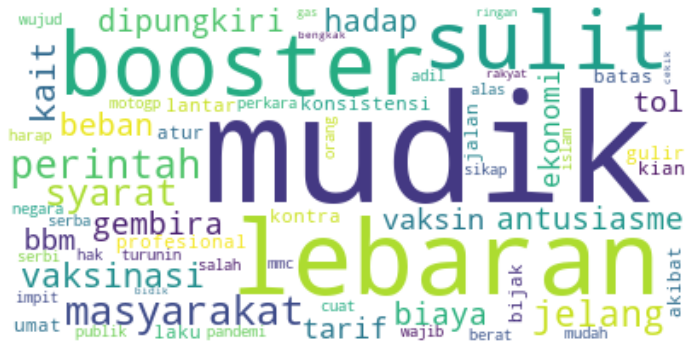

In [ ]:
from wordcloud import WordCloud
tweet_clean_kapitalisme['text_x'] = tweet_clean_kapitalisme['text_x'].astype(str)
text = " ".join(x for x in tweet_clean_kapitalisme.text_x)
f, ax = plt.subplots(1, 1, figsize = (10, 9))
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('G5 - Wordcloud 1.png', format = 'PNG')
plt.show()

In [ ]:
with open("text_kapitalisme.txt", "w") as output:
    output.write(str(text))

Hashtag #KapitalismeNyusahin sering digunakan bersamaan dengan #LebaranDenganKhilafah. Kedua hashtag tersebut digunakan oleh 218 akun yang berbeda untuk membagikan artikel ataupun video dari laman Muslimah Media Center. Dari wordcloud terlihat bahwa tweet ini diarahkan kepada pemerintah sebagai kontra terhadap diperbolehkannya mudik lebaran di masa pandemi dengan pertimbangan aspek ekonomi.


In [ ]:
idx = tweet['hashtags'].dropna()
tweet_hashtag_all_erick = tweet.loc[idx.index]
tweet_hashtag_all_erick['idx2'] = tweet_hashtag_all_erick['hashtags'].str.lower().str.find('erickthohirsolusirakyat')
tweet_hashtag_all_erick.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,idx2
7,x818341300797722624,x1520062239574999047,2022-04-29 15:27:33,PoldaJogja,Sehingga tujuan mudik aman dan sehat dapat ter...,Twitter Web App,114,x1520062155793780736,x818341300797722624,PoldaJogja,...,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...,-1
9,x818341300797722624,x1519964697680031745,2022-04-29 08:59:58,PoldaJogja,Kegiatan dilanjutkan dengan arahan dari tim Su...,Twitter Web App,204,x1519964631141588992,x818341300797722624,PoldaJogja,...,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...,-1
13,x818341300797722624,x1520020332534693888,2022-04-29 12:41:02,PoldaJogja,"Turut hadir mendampingi Wakapolda, Dirpolair P...",Twitter Web App,255,x1520020185662767107,x818341300797722624,PoldaJogja,...,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...,-1
48,x168469708,x1520036712084537345,2022-04-29 13:46:07,IDCorner,"2,5 Juta Orang Sudah Mudik Hingga H-4 Lebaran ...",IDCorner.Co.iD,83,NaN,NaN,NaN,...,362,2010-07-19 12:10:57,False,https://t.co/sxOmdA2ELd,https://idcorner.co.id,NaN,https://pbs.twimg.com/profile_banners/16846970...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1116895717...,-1
49,x168469708,x1519970944785158145,2022-04-29 09:24:47,IDCorner,Bosch Ajak Masyarakat Memeriksa Kelistrikan Mo...,IDCorner.Co.iD,101,NaN,NaN,NaN,...,362,2010-07-19 12:10:57,False,https://t.co/sxOmdA2ELd,https://idcorner.co.id,NaN,https://pbs.twimg.com/profile_banners/16846970...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1116895717...,-1


In [ ]:
tweet_hashtag_all_erick = tweet_hashtag_all_erick[tweet_hashtag_all_erick["idx2"] != -1]
tweet_hashtag_all_erick.shape

(600, 91)

In [ ]:
tweet_hashtag_erick = tweet_hashtag_all_erick[['status_id', 'screen_name', 'text']]
tweet_hashtag_erick_unik_tweet = tweet_hashtag_erick.drop_duplicates('text')
tweet_hashtag_erick_unik_tweet.shape

(598, 3)

In [ ]:
tweet_hashtag_erick_unik_user = tweet_hashtag_erick.drop_duplicates('screen_name')
tweet_hashtag_erick_unik_user.shape

(156, 3)

Dari 600 tweet yang menggunakan hashtag #ErickThohirSolusiRakyat terdapat 598 isi tweet yang berbeda sehingga hanya 2 tweet yang memiliki isi yang sama. Hal ini berarti, masing-masing tweet diposting dengan susunan kata yang berbeda-beda. 

In [ ]:
tweet_clean_hastag_erick = pd.merge(tweet_clean, tweet_hashtag_erick, how="right", on=["status_id"])
tweet_clean_hastag_erick.head()

,status_id,text_x,screen_name,text_y
0,x1520058238565511168,menteri bumn hadir plepasan mudik gratis bumn ...,Cahaya_CintaNda,Menteri BUMN @erickthohir\r\n menghadiri plepa...
1,x1520060499517657088,lepas mudik gratis bumn pesan hati hati jalan ...,Cahaya_CintaNda,"Dalam Pelepasan Mudik Gratis BUMN 2022, @erick..."
2,x1520058457864359937,mudik gratis bumn elektabilitas erick thohir,MamaGlo10,@Nadia_naa16 @erickthohir @merdekadotcom Mudik...
3,x1520050712730009600,menteri bumn erick thohir tinjau langsung lepa...,Rena_mareta,Menteri BUMN Erick Thohir meninjau lgsg pelepa...
4,x1519989959746211841,menteri bumn larang keras dewan direksi komisa...,bwinsandi3,"Menteri BUMN, @erickthohir, melarang keras sel..."


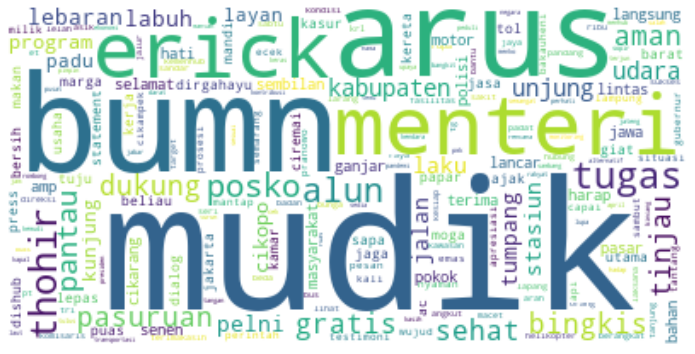

In [ ]:
from wordcloud import WordCloud
text_erick = " ".join(title for title in tweet_clean_hastag_erick.text_x)
f, ax = plt.subplots(1, 1, figsize = (10, 9))
word_cloud_erick = WordCloud(collocations = False, background_color = 'white').generate(text_erick)
plt.imshow(word_cloud_erick, interpolation='bilinear')
plt.axis("off")
plt.savefig('G6 - Wordcloud 2.png', format = 'PNG')
plt.show()

In [ ]:
with open("text_erick.txt", "w") as output:
    output.write(str(text_erick))

Dari wordcloud terlihat bahwa tweet ini digunakan untuk mengapresiasi kinerja Erick Thohir (Menteri BUMN Indonesia) dalam memantau masa mudik lebaran ini.   

# **Top Mentions**

In [ ]:
rep = tweet['mentions_screen_name']
rep = rep.dropna()
rep

0                            kkomu18 lets_winwing
1                          PlateJohnny kemkominfo
2                          PlateJohnny kemkominfo
3                          PlateJohnny kemkominfo
18                                  hanniemooniee
                           ...                   
156049                            __salmon_mantai
156053                                jurnalrosie
156055    PrivyID MeIbiSawin Kerkays u_deserve_1t
156056                                fraqquccino
156058                               hidupindomie
Name: mentions_screen_name, Length: 59990, dtype: object

In [ ]:
rep = rep.apply(hastag_lower)

In [ ]:
vectorizer = CountVectorizer(ngram_range =(1,1), min_df = 100)
doc_matrix = vectorizer.fit_transform(rep)
doc_matrix = doc_matrix.toarray()

In [ ]:
doc_df = pd.DataFrame(data = doc_matrix)
doc_df.columns = vectorizer.get_feature_names()
display(doc_df.head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,_ekokuntadhi,aniesbaswedan,areajulid,askrlfess,chitaglorya__,chusnulch__,cnnindonesia,convomf,convomfs,dandhy_laksono,...,platejohnny,prastow,provjateng,radioelshinta,sbyfess,tajyasinmz,tanyakanrl,tatakujiyati,tvindonesiawkwk,wulingmotorsid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
doc_df.loc['Total',:] = doc_df.sum(axis=0)
doc_df.iloc[:, np.argsort(doc_df.loc['Total'])]

,kompastv,fullmoonfolks,tatakujiyati,kai121,hyang_wisnu,kochengfess,nctzenbase,cnnindonesia,wulingmotorsid,kegblgnunfaedh,...,kemenbumn,pertamina,kumhamsumsel,jokowi,tanyakanrl,dennysiregar7,convomf,palembanglpka,erickthohir,kemenkumham_ri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total = doc_df.loc['Total'].sort_values(ascending = False)

In [ ]:
total = pd.DataFrame(total).reset_index()
total['Total'] = pd.to_numeric(total['Total'], downcast='integer')
total = total[total['Total'] > 520]
total

,index,Total
0,kemenkumham_ri,1441
1,erickthohir,1218
2,palembanglpka,995
3,convomf,980
4,dennysiregar7,827
5,tanyakanrl,730
6,jokowi,677
7,kumhamsumsel,539
8,pertamina,529
9,kemenbumn,528


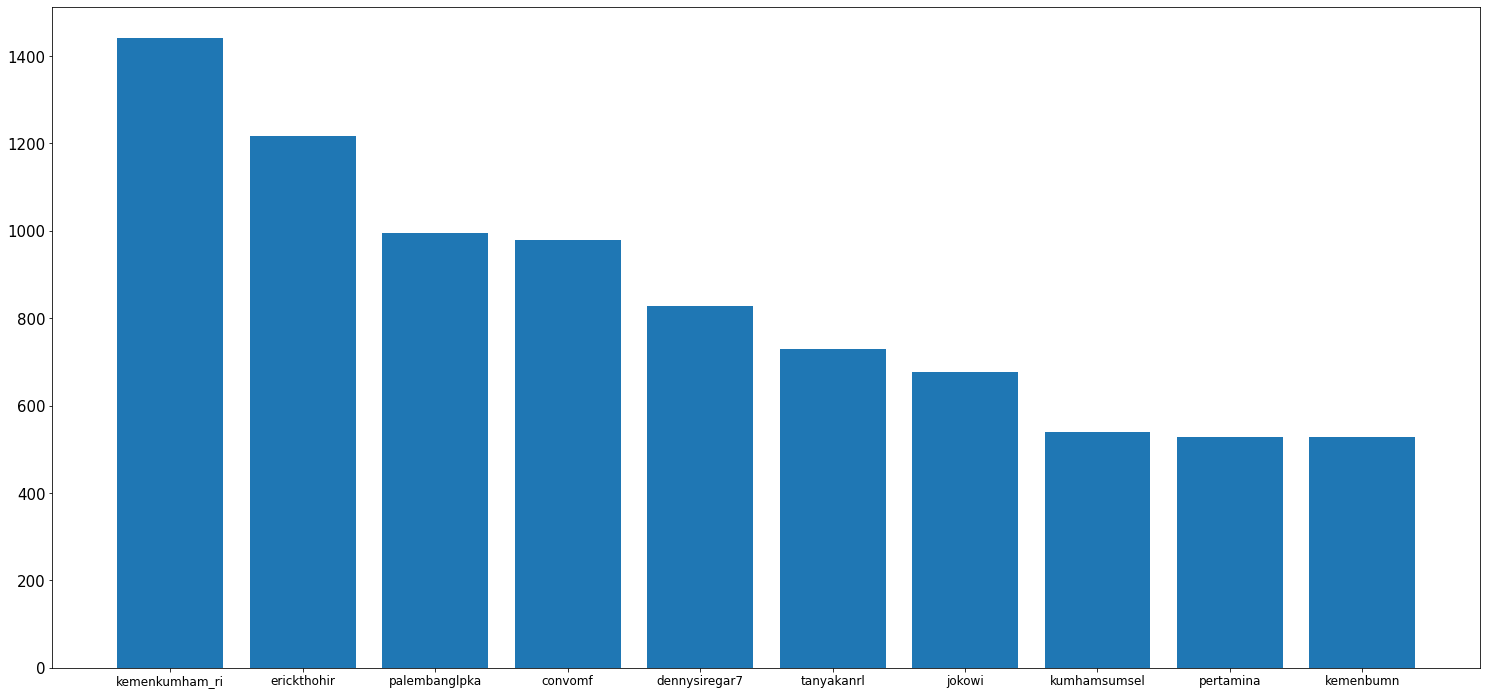

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (21, 10))
plt.bar(total['index'], total['Total'])
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 15)
plt.savefig('G7 - Reply.png', format = 'PNG')
plt.show()

Dari barplot terlihat bahwa akun yang sering di-reply tweetnya yaitu **akun pemerintah** seperti @kemenkumham_ri, @palembanglpka, @kumhamsumsel, @pertamina, dan @kemenbumn, **akun tokoh ternama** seperti @erickthohir, @dennysiregar7, dan @jokowi,serta akun menfess seperti @convomf dan @tanyakanrl. 

# **Top Retweet**

In [ ]:
retweet = pd.DataFrame({'Status ID' : tweet['status_id'],
                        'Username' : tweet['screen_name'],
                        'Tweet' : tweet['text'],
                        'Retweet Count' :tweet['retweet_count']})
retweet.head()

,Status ID,Username,Tweet,Retweet Count
0,x1520062251319046144,kejutam,@kkomu18 @lets_winwing ditunggu mudik nya ke B...,0
1,x1520062247283806209,Gajah_Mada01,"Mudik Aman,lancar dan gembira serta kembali ke...",0
2,x1520046431884955648,Gajah_Mada01,Menkominfo berharap masyarakat yang mudik untu...,0
3,x1520051249193709570,Gajah_Mada01,Menkominfo hari ini melepas 180 sivitas yang m...,0
4,x1519964545225469953,PoldaJogja,"""Di mana dalam perayaan Idul Fitri tahun 2022,...",0


In [ ]:
retweet = retweet.sort_values(by = 'Retweet Count', ascending = False)
retweet.head()

,Status ID,Username,Tweet,Retweet Count
79728,x1521286837314023425,arman_dhani,Tahun ini nilai dan cara pandang saya terhadap...,2265
32052,x1520353652183306240,akukangmasmu,@tvindonesiawkwk reporter : bagaimana perasaan...,1015
32144,x1520353002124562432,klmnopqruss,@tvindonesiawkwk <U+0001F9D1><U+200D><U+0001F9...,529
30982,x1520363914801733633,Mdy_Asmara1701,Diwajibkan Pakai Kaos Bergambar Menantu Jokowi...,449
84980,x1521295498014953472,jokowi,"Alhamdulillah, perayaan Idulfitri tahun ini be...",370


Berdasarkan tabel, terlihat bahwa tweet dengan retweet count tertinggi merupakan tweet yang diunggah oleh @arman_dhani. Untuk mengetahui laman tweet-nya dapat memasukkan username dan Status ID dengan format link sebagai berikut:

*https://twitter.com/username/status/status_id*

Contoh: Laman tweet yang diunggah oleh @arman_dhani dengan Status ID x1521286837314023425 yaitu sebagai berikut:

*https://twitter.com/arman_dhani/status/1521286837314023425*

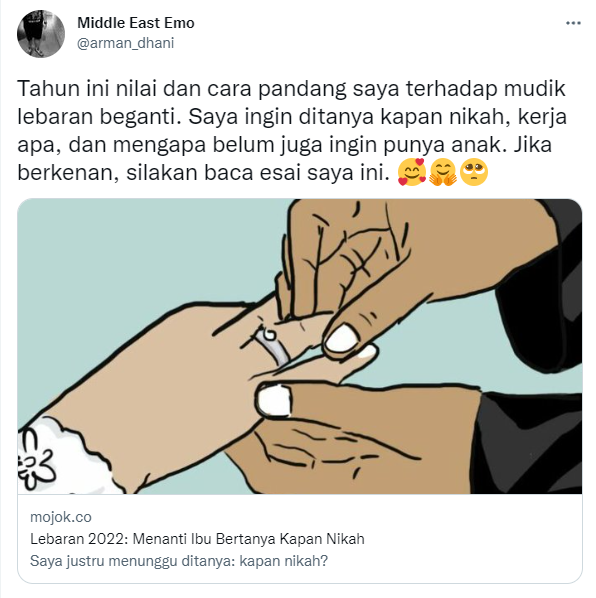

Tweet dengan banyak retweet tertinggi saat masa mudik yaitu tweet yang dibagikan oleh user @arman_dhani yang berisi ajakan untuk membacai esai mengenai pandangan baru terhadap pertanyaan-pertanyaan yang sering diajukan saat bersilaturahmi dengan keluarga atau teman. Tweet tersebut sampai saat ini berhasil mendapatkan lebih dari 5000 retweet dan 200 replay. 